In [97]:
17*5*1e-2

0.85

In [101]:
1/100

0.01

In [99]:
import matplotlib.pyplot as plt
import pandas as pd

inst= 'LDR_2'

## Note that values are amplified by x100
df = pd.read_csv(f"traces_bank_current_trigger/time_analysis/unitary_test/{inst}.csv", skiprows=10)
df.columns = ['time', 'voltage', 'trig']

rslt_df= df[df['trig'] > 2]

exec_time= rslt_df['time'].iloc[-1]-rslt_df['time'].iloc[0]

exec_time



1.6900000000000001e-06

In [61]:
import os
import pandas as pd
import numpy as np


def code_exec_time(nb_inst):
    t_cycle= 0.05 # micro-seconds, since freq= 20MHz
    return t_cycle*nb_inst

def get_time_by_inst(dir_path, inst_name):
    exec_time_dict = {}
    exec_time_list = []
    for filename in os.listdir(dir_path):
        relative_path = os.path.join(dir_path, filename)
        # checking if it is a file
        if os.path.isfile(relative_path) and filename.endswith('.csv') and filename.startswith(inst_name):
            df = pd.read_csv(relative_path, skiprows=10)
            df.columns = ['time', 'voltage', 'trig']

            rslt_df= df[df['trig'] > 2]

            exec_time_dict[filename] = rslt_df['time'].iloc[-1]-rslt_df['time'].iloc[0]
            exec_time_list.append(rslt_df['time'].iloc[-1]-rslt_df['time'].iloc[0])

    # exec_time_dict= dict( sorted(exec_time_dict.items(), key=lambda x: x[0].lower()) )
    return np.array(list(dict(sorted(exec_time_dict.items(), key=lambda x: x[0].lower())).values()))


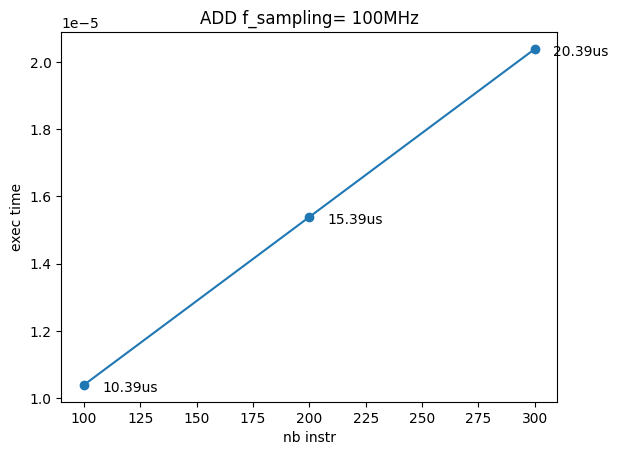

In [55]:
import matplotlib.pyplot as plt
import numpy as np

inst = "ADD"
add_time_list = get_time_by_inst("traces_bank_current_trigger/time_analysis", inst)

x = [100, 200, 300]
y = add_time_list

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y, marker= 'o')
for i,j in zip(x,y):
    ax.annotate(str(round(j*1e6, 3))+"us",xy=(i+8,j-0.02e-5))

plt.title(f"{inst} f_sampling= 100MHz")
plt.xlabel("nb instr")
plt.ylabel("exec time")
plt.show()


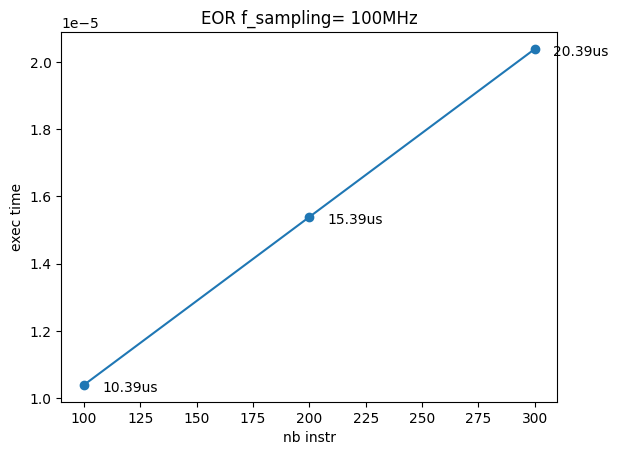

In [56]:
import matplotlib.pyplot as plt
import numpy as np

inst = "EOR"
add_time_list = get_time_by_inst("traces_bank_current_trigger/time_analysis", inst)

x = [100, 200, 300]
y = add_time_list

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y, marker= 'o')
for i,j in zip(x,y):
    ax.annotate(str(round(j*1e6, 3))+"us",xy=(i+8,j-0.02e-5))

plt.title(f"{inst} f_sampling= 100MHz")
plt.xlabel("nb instr")
plt.ylabel("exec time")
plt.show()


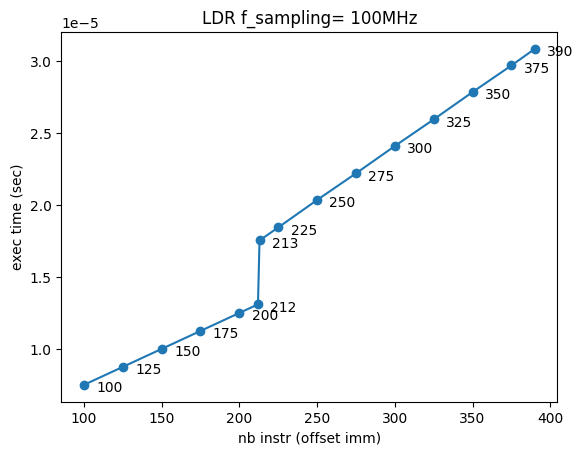

In [109]:
import matplotlib.pyplot as plt
import numpy as np

inst = "LDR"
add_time_list = get_time_by_inst("traces_bank_current_trigger/time_analysis/", inst)

x = [100, 125, 150, 175, 200, 212, 213, 225, 250, 275, 300, 325, 350, 375, 390]
y = add_time_list

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y, marker= 'o')
for i,j in zip(x,y):
    # ax.annotate(str(round(j*1e6, 3))+"us",xy=(i+8,j-0.02e-5))
    ax.annotate(i,xy=(i+8,j-5e-7))

plt.title(f"{inst} f_sampling= 100MHz")
plt.xlabel("nb instr (offset imm)")
plt.ylabel("exec time (sec)")
plt.show()


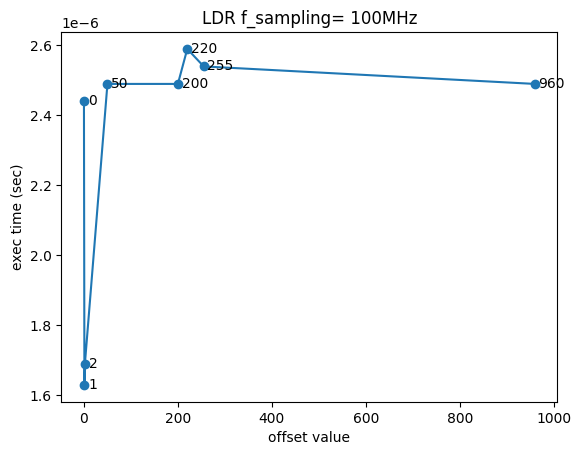

In [107]:
import matplotlib.pyplot as plt
import numpy as np

inst = "LDR"
add_time_list = get_time_by_inst("traces_bank_current_trigger/time_analysis/unitary_test", inst)

x = [0, 1, 2, 50, 200, 220, 255, 960]
y = add_time_list

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y, marker= 'o')
for i,j in zip(x,y):
    # ax.annotate(str(round(j*1e6, 3))+"us",xy=(i+8,j-0.02e-5))
    ax.annotate(i,xy=(i+8,j-0.1e-7))

plt.title(f"{inst} f_sampling= 100MHz")
plt.xlabel("offset value")
plt.ylabel("exec time (sec)")
plt.show()


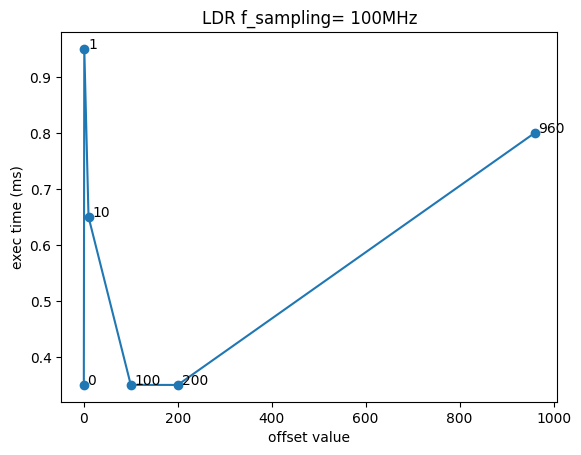

In [108]:
import matplotlib.pyplot as plt
import numpy as np

x = [0, 1, 10, 100, 200, 960]
y = [0.35, 0.95, 0.65, 0.35, 0.35, 0.8]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(x,y, marker= 'o')
for i,j in zip(x,y):
    # ax.annotate(str(round(j*1e6, 3))+"us",xy=(i+8,j-0.02e-5))
    ax.annotate(i,xy=(i+8,j-0.1e-7))

plt.title("LDR f_sampling= 100MHz")
plt.xlabel("offset value")
plt.ylabel("exec time (ms)")
plt.show()
